In [1]:
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Gas Price

###### Source: U.S. Energy Information Administration, US Regular All Formulations Gas Price [GASREGW], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GASREGW, October 5, 2023. 

###### Weighted average based on sampling of approximately 900 retail outlets, 8:00AM Monday. The price represents self-service unless only full-service is available and includes all taxes. See (http://www.eia.doe.gov/oil_gas/petroleum/data_publications/wrgp/mogas_home_page.html) for further definitions. Regular Gasoline has an antiknock index (average of the research octane rating and the motor octane number) greater than or equal to 85 and less than 88. Octane requirements may vary by altitude.



Units:
Dollars per Gallon,
Not Seasonally Adjusted

Frequency:
Weekly,
Ending Monday 


In [2]:
import matplotlib.pyplot as plt
gas_price = pd.read_csv(r'C:\Users\user\Downloads\GASREGW.csv')


gas_price.head(10)
#*GASREGW: Gas Regular Weekly
gas_price.rename(columns={'GASREGW': 'gas_price', 'DATE' : 'Date'}, inplace= True)
gas_price.describe()
gas_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1729 non-null   object
 1   gas_price  1729 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB


In [3]:
gas_price.sort_values('gas_price', ascending= True)
gas_price['gas_price'] = pd.to_numeric(gas_price['gas_price'], errors='coerce').dropna() 
gas_price['Date'] = pd.to_datetime(gas_price['Date'])
gas_price_monthly = gas_price.resample('M', on = 'Date')['gas_price'].mean()
gas_price_monthly = pd.DataFrame(gas_price_monthly)
gas_price_monthly.reset_index(inplace=True)
gas_price_monthly['Date'] = gas_price_monthly['Date'].dt.strftime('%Y-%m')
gas_price_monthly.sort_values('gas_price', ascending= True)

,Date,gas_price
102,1999-02,0.92050
101,1999-01,0.93900
100,1998-12,0.94500
103,1999-03,0.98200
99,1998-11,0.99540
...,...,...
380,2022-04,4.10850
379,2022-03,4.22175
381,2022-05,4.44360
383,2022-07,4.55925


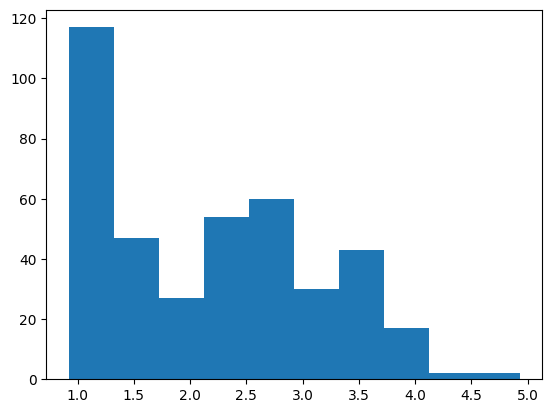

In [4]:
#Plotting values to overview outliers and strange values
plt.hist(gas_price_monthly['gas_price'])
plt.show()

        Date  gas_price
353  2020-01    2.54775
354  2020-02    2.44200
355  2020-03    2.23420
356  2020-04    1.84050
357  2020-05    1.86950


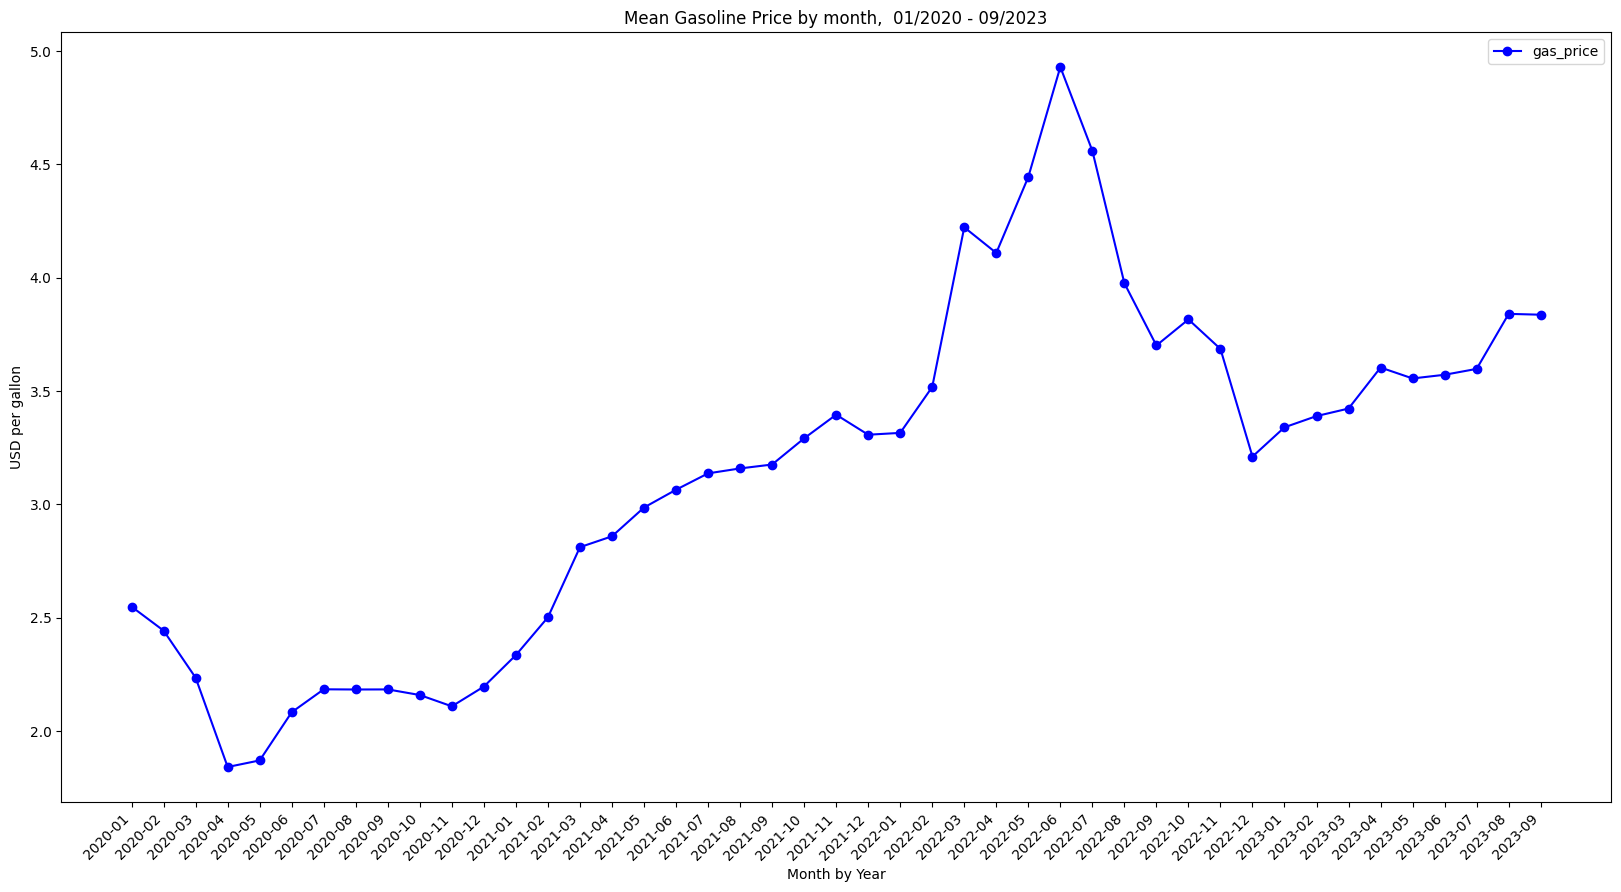

In [5]:
#Selecting and plotting data matching COVID-19 dates
gas_price_monthly = gas_price_monthly[(gas_price_monthly['Date'] >= '2020-01') & (gas_price_monthly['Date'] < '2023-10')]
print(gas_price_monthly.head())
ax = gas_price_monthly.plot(x='Date', y='gas_price', marker='o', xlabel='Month by Year', ylabel='USD per gallon', color='blue', 
                               title='Mean Gasoline Price by month,  01/2020 - 09/2023')
plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(gas_price_monthly['Date'])))
ax.set_xticklabels(gas_price_monthly['Date'], rotation=45, ha='right')
plt.savefig('Mean Gasoline Price by month.png')
plt.show()

##### Source: Variable time span	Jan 8, 2020 – Sep 27, 2023 Data published by WHO COVID-19 Dashboard. Geneva: World Health Organization, 2020. Available online: https://covid19.who.int/WHO-COVID-19-global-data.csv


In [6]:
covid_cases = pd.read_csv('C:/Users/user/Downloads/WHO-COVID-19-global-data.csv')

covid_cases.head(50)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [7]:
covid_cases.shape
covid_cases.describe()
covid_cases.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [8]:
covid_cases.rename(columns={'Date_reported': 'Date', 'New_cases' : 'covid_new_cases'}, inplace=True)
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
covid_cases_m = covid_cases.resample('M', on='Date')['covid_new_cases'].sum()
covid_cases_m = covid_cases_m.reset_index()
covid_cases_m['covid_new_cases'] = pd.to_numeric(covid_cases_m['covid_new_cases'])
covid_cases_m['Date'] = covid_cases_m['Date'].dt.strftime('%Y-%m')

covid_cases_m.head()

,Date,covid_new_cases
0,2020-01,9843
1,2020-02,75364
2,2020-03,697575
3,2020-04,2222860
4,2020-05,2886396


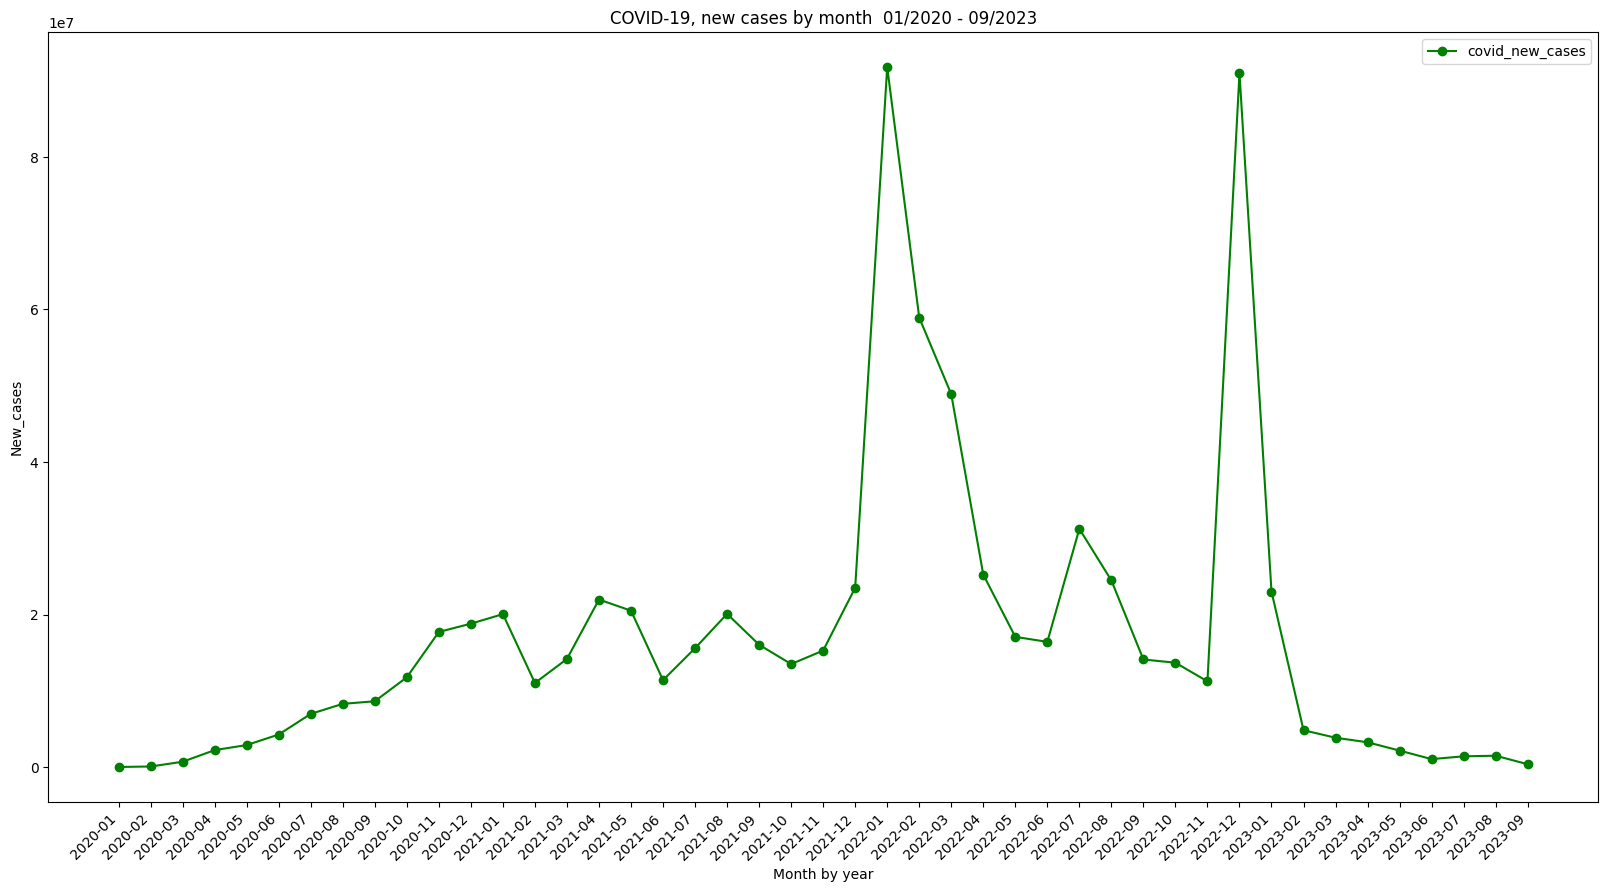

In [9]:
ax = covid_cases_m.plot(kind='line', x='Date', y='covid_new_cases', xlabel='Month by year',  marker='o', ylabel='New_cases', color='green',
                      title='COVID-19, new cases by month  01/2020 - 09/2023')

plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(covid_cases_m['Date'])))
ax.set_xticklabels(covid_cases_m['Date'], rotation=45, ha='right')
plt.show()

##### Source: https://finance.yahoo.com/quote/ETH-USD/history?period1=1510099200&period2=1695859200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true, october 5 2023

Objectives:
- Is it worth to invest and withdraw profits ?
- Is there any correlation to other global factors ?
- Verify quality of data
- Differences before and after COVID-19
- Plotting mean Open monthly value through years
- Plotting mean Open monthly value differences through years

Trend Analysis: Studying how the price of Ethereum changes over time.

Volatility Analysis: Examining how much the price fluctuates from high to low in a day.

Volume Analysis: Understanding the trading activity and its relation to price movements.

Correlation Analysis: Investigating potential relationships between Ethereum's price and other variables or external factors.

Predictive Modeling: Using historical data to create models predicting future price movements.



- Date: The date of the data entry.
- Open: The opening price of Ethereum on that date.
- High: The highest price of Ethereum reached during the day.
- Low: The lowest price of Ethereum reached during the day.
- Close: The closing price of Ethereum on that date.
- Adj Close: The adjusted closing price, which accounts for events like dividends, stock splits, etc., giving a more accurate reflection of the stock's value.
- Volume: The trading volume, indicating how many shares were traded on that day.


## Exploratory Data Analysis

In [10]:
#Relating with the df
ethereum = pd.read_csv('C:/Users/user/Downloads/ETH-USD.csv')
ethereum.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [11]:
#Quality of data; ensuring there is no empty data or weird outliers
ethereum.isna().sum()
ethereum.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2.157000e+03
mean,1207.471340,1242.767934,1167.993290,1207.875751,1207.875751,1.213987e+10
std,1129.186851,1162.055277,1091.498596,1128.633872,1128.633872,1.031210e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,226.976364,231.755005,221.241760,227.138290,227.138290,4.612000e+09
50%,763.369995,796.439026,726.664001,772.640991,772.640991,9.364980e+09
75%,1833.715576,1862.914917,1798.406006,1832.999634,1832.999634,1.678856e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


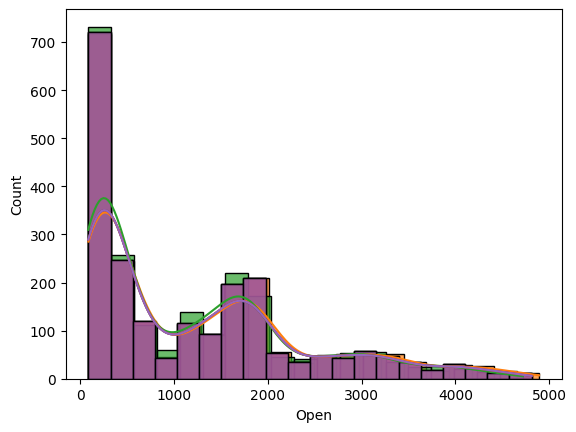

In [12]:
#Next We visualize the described data
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    sns.histplot(ethereum[column], kde=True, label=column, alpha=0.7)

plt.show()

### Plotting mean Open monthly value through years

In [13]:
#Preparing df for plotting
ethereum.rename(columns={'Volume':'e_volume', 'Open':'e_open'}, inplace=True)
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
e_open_monthly = ethereum.resample('M', on='Date')['e_open'].mean()
e_open_monthly.index = e_open_monthly.index.strftime('%Y-%m')

print(e_open_monthly.head())

Date
2017-11     373.696317
2017-12     630.583997
2018-01    1093.099893
2018-02     882.527006
2018-03     640.787129
Name: e_open, dtype: float64


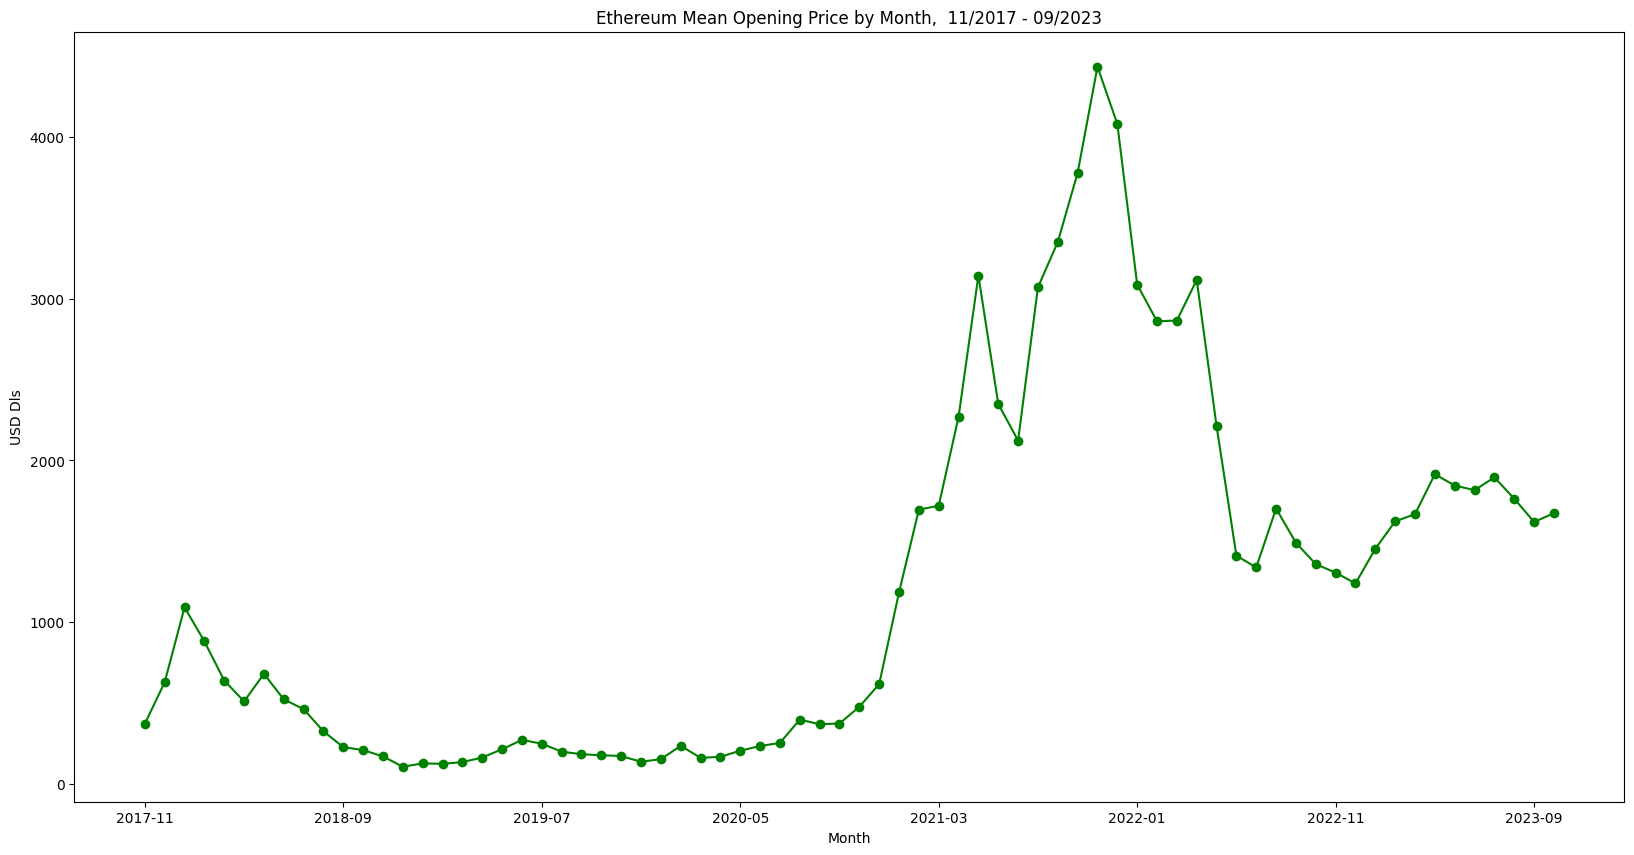

In [14]:
#Visualizing df through dates
plt.figure(figsize=(20, 10))
e_open_monthly.plot(kind='line', x='Date', y='e_open', xlabel='Month',  marker='o', ylabel='USD Dls', color='green',
                      title='Ethereum Mean Opening Price by Month,  11/2017 - 09/2023')


plt.show()

### Plotting mean Open monthly value differences through years 

In [15]:
#Preparing for plotting USD Dld differences through months
ethereum_monthly_diff = pd.DataFrame(e_open_monthly)
ethereum_monthly_diff['e_month_diff'] = ethereum_monthly_diff['e_open'].diff()
ethereum_monthly_diff['e_open'] = pd.to_numeric(ethereum_monthly_diff['e_open'], errors='coerce').fillna(0)
ethereum_monthly_diff['e_month_diff'] = pd.to_numeric(ethereum_monthly_diff['e_month_diff'], errors='coerce').fillna(0)
ethereum_monthly_diff= ethereum_monthly_diff.reset_index()
ethereum_monthly_diff= ethereum_monthly_diff[['Date','e_month_diff']]

print(ethereum_monthly_diff.head(10))


      Date  e_month_diff
0  2017-11      0.000000
1  2017-12    256.887680
2  2018-01    462.515896
3  2018-02   -210.572887
4  2018-03   -241.739877
5  2018-04   -128.638196
6  2018-05    169.897196
7  2018-06   -157.454161
8  2018-07    -60.545454
9  2018-08   -136.977291


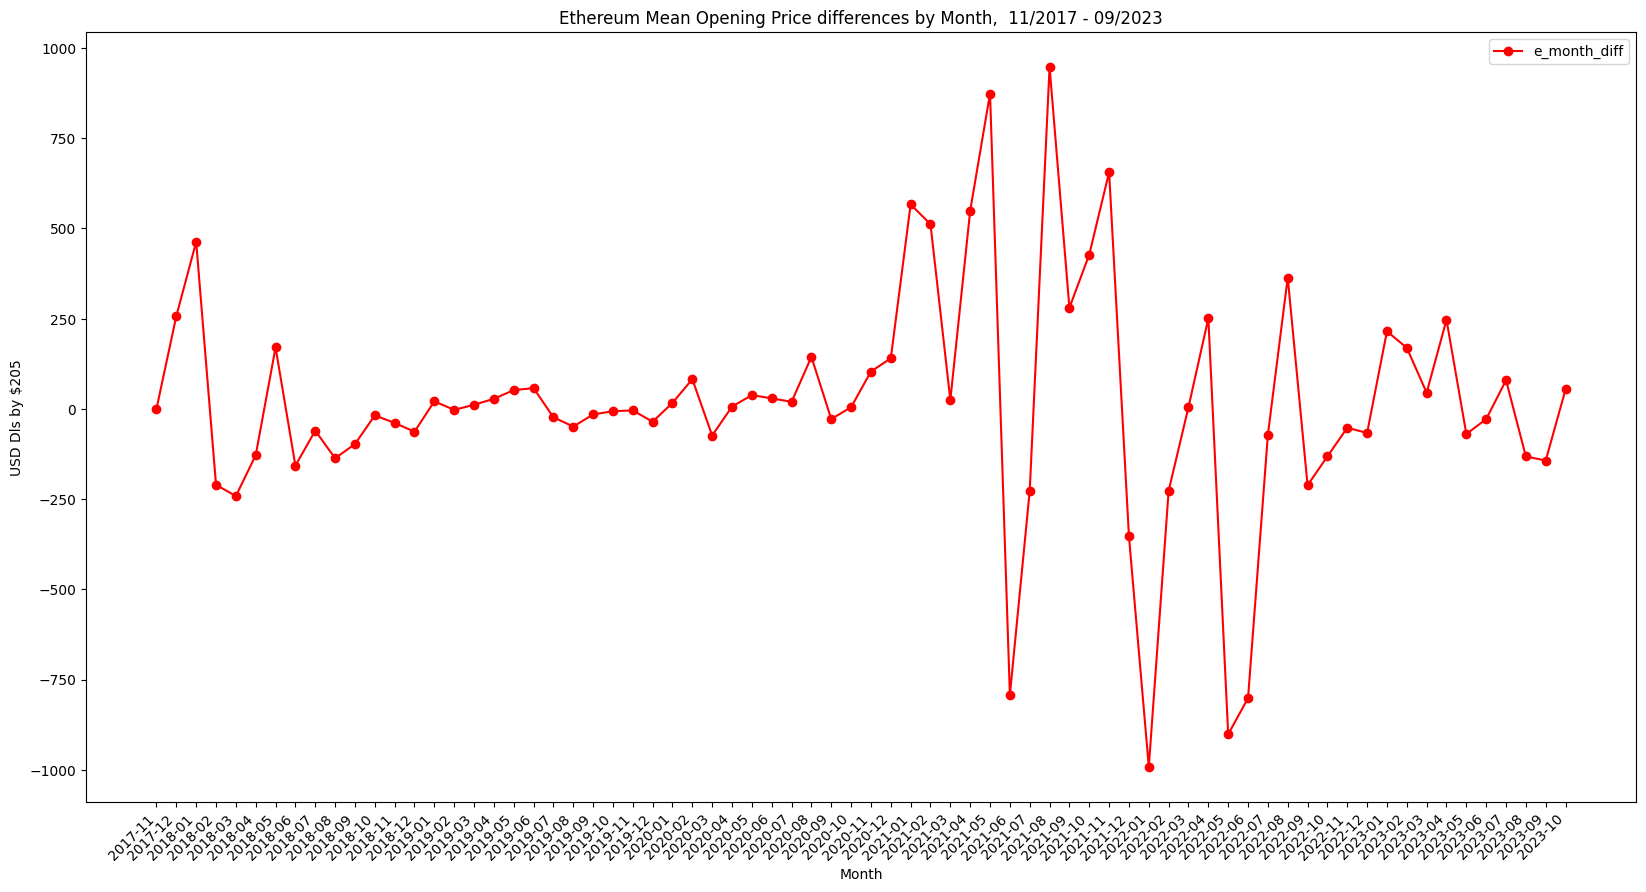

In [16]:
#Plotting
ax= ethereum_monthly_diff.plot(kind='line',x='Date', y='e_month_diff', marker='o', xlabel='Month', ylabel='USD Dls by $205', color='red', 
                               title='Ethereum Mean Opening Price differences by Month,  11/2017 - 09/2023')
plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(ethereum_monthly_diff['Date'])))
ax.set_xticklabels(ethereum_monthly_diff['Date'], rotation=45, ha='right')
plt.show()

### Selecting and plotting data matching COVID-19 dates

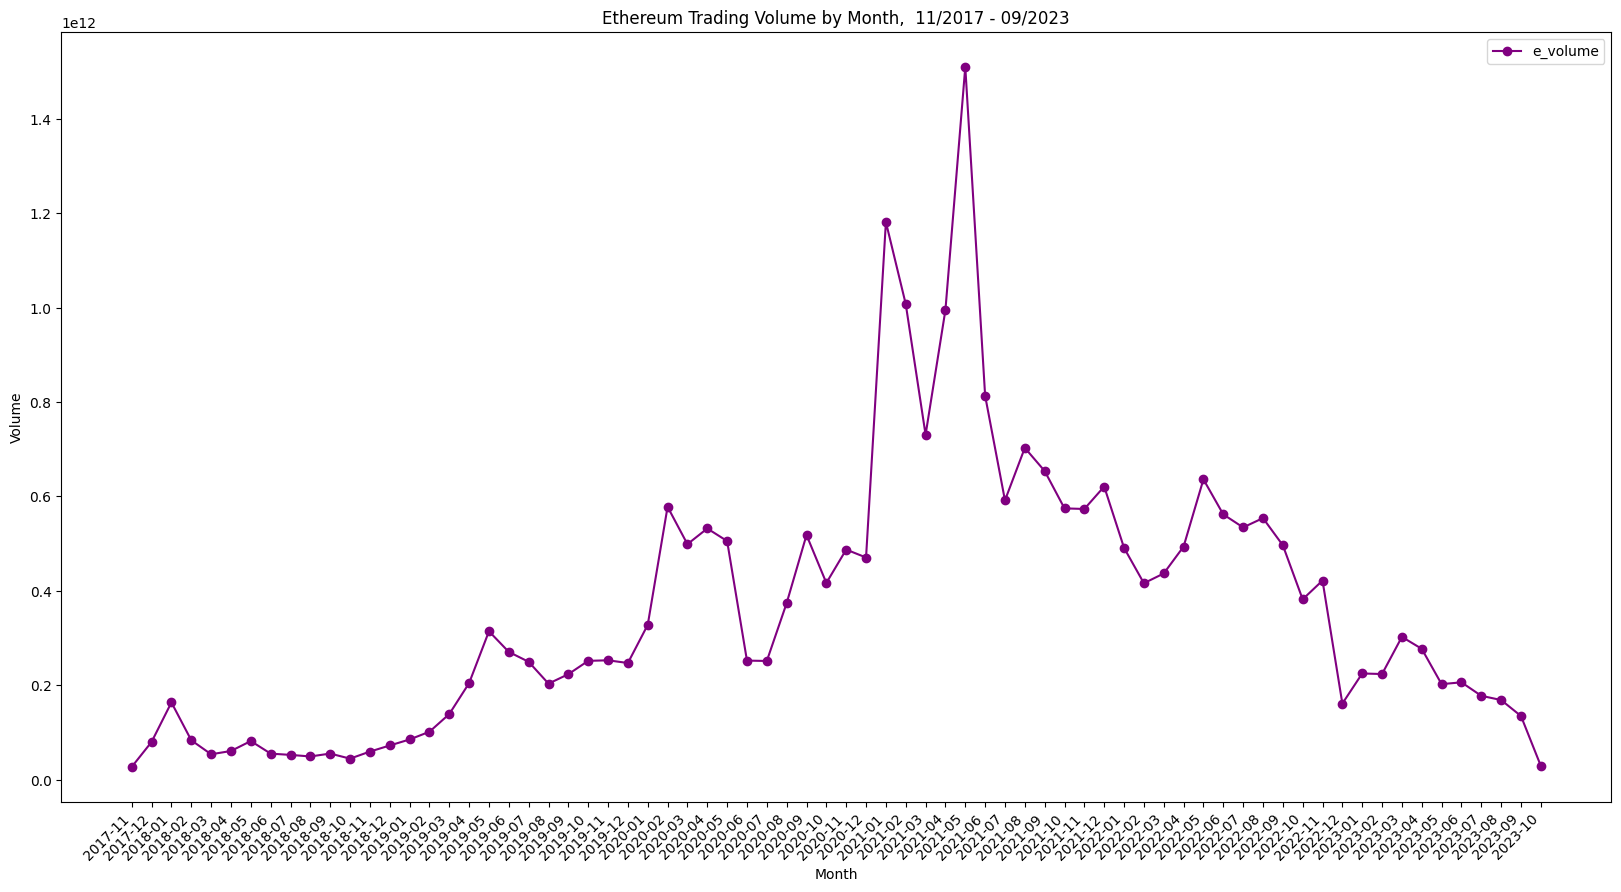

In [17]:
ethereum['Date'] = pd.to_datetime(ethereum['Date'])

e_volume_monthly = ethereum.resample('M', on='Date')['e_volume'].sum()
ethereum = ethereum[(ethereum['Date'] >= '2020-01') & (ethereum['Date'] < '2023-10')]

e_volume_monthly.index = e_volume_monthly.index.strftime('%Y-%m')
e_volume_monthly= e_volume_monthly.reset_index()

e_plotvolume = e_volume_monthly.plot(kind='line',x='Date', y='e_volume', marker='o', xlabel='Month', ylabel='Volume', color='purple', 
                               title='Ethereum Trading Volume by Month,  11/2017 - 09/2023')
plt.gcf().set_size_inches(20, 10)
e_plotvolume.set_xticks(range(len(e_volume_monthly['Date'])))
e_plotvolume.set_xticklabels(e_volume_monthly['Date'], rotation=45, ha='right')


plt.show()

#### Merging Ethereum Volume and Covid New Cases into merged_data DF

In [18]:
merged_data = e_volume_monthly.merge(covid_cases_m, on = 'Date')
merged_data.head()

,Date,e_volume,covid_new_cases
0,2020-01,327976431869,9843
1,2020-02,578092481246,75364
2,2020-03,498921414458,697575
3,2020-04,532158870567,2222860
4,2020-05,505593287696,2886396


#### Plotting 

<Axes: xlabel='e_volume', ylabel='covid_new_cases'>

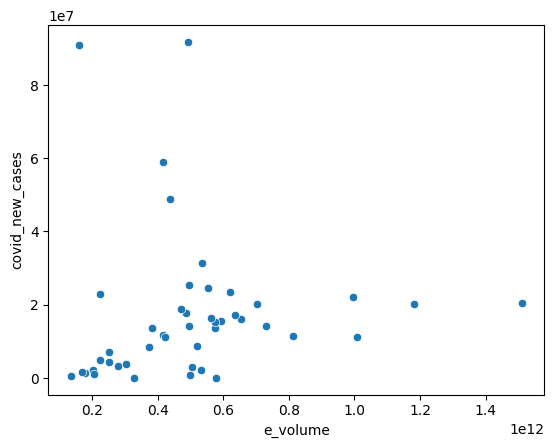

In [19]:
sns.scatterplot(x='e_volume', y='covid_new_cases', data=merged_data)

#### Computing correlation coefficient 

In [20]:
correlation_coefficient = merged_data['e_volume'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")




Correlation Coefficient: 0.059207237632353284
Correlation Level: weak correlation


#### Merging Ethereum Monthly Diff to merged_data DF

In [21]:
merged_data = merged_data.merge(ethereum_monthly_diff, on ='Date')
merged_data.head()

,Date,e_volume,covid_new_cases,e_month_diff
0,2020-01,327976431869,9843,16.536064
1,2020-02,578092481246,75364,82.057116
2,2020-03,498921414458,697575,-74.142160
3,2020-04,532158870567,2222860,6.253120
4,2020-05,505593287696,2886396,37.858542


#### Plotting

<Axes: xlabel='e_month_diff', ylabel='covid_new_cases'>

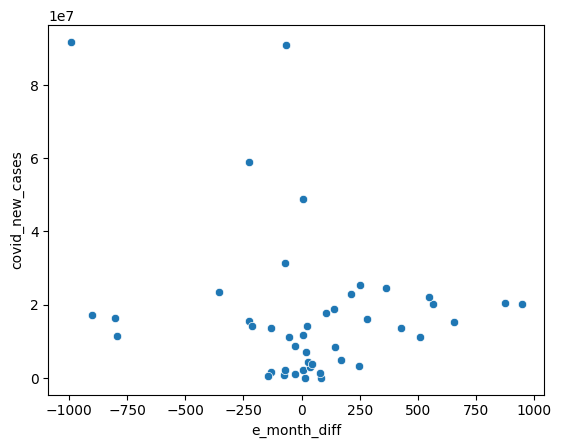

In [22]:
sns.scatterplot(x='e_month_diff', y='covid_new_cases', data=merged_data)

In [23]:
correlation_coefficient = merged_data['e_month_diff'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")



Correlation Coefficient: -0.22236922726150912
Correlation Level: weak correlation


#### Merging Ethereum Open Monthly to merged_data DF

In [24]:
merged_data = merged_data.merge(e_open_monthly, on='Date')
merged_data.head()

,Date,e_volume,covid_new_cases,e_month_diff,e_open
0,2020-01,327976431869,9843,16.536064,155.320137
1,2020-02,578092481246,75364,82.057116,237.377253
2,2020-03,498921414458,697575,-74.142160,163.235093
3,2020-04,532158870567,2222860,6.253120,169.488213
4,2020-05,505593287696,2886396,37.858542,207.346755


### Plotting

<Axes: xlabel='e_open', ylabel='covid_new_cases'>

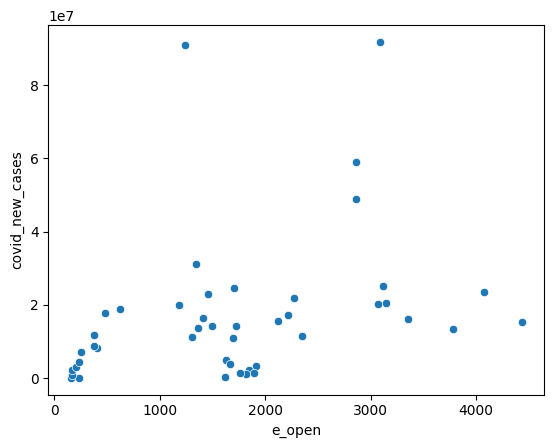

In [25]:
sns.scatterplot(x='e_open', y='covid_new_cases', data=merged_data)

In [26]:
correlation_coefficient = merged_data['e_open'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")


Correlation Coefficient: 0.34156368579818086
Correlation Level: moderate correlation


### Merging Gas Price Monthly to merged_data DF

In [27]:
merged_data = merged_data.merge(gas_price_monthly, on = 'Date')
merged_data.head()

,Date,e_volume,covid_new_cases,e_month_diff,e_open,gas_price
0,2020-01,327976431869,9843,16.536064,155.320137,2.54775
1,2020-02,578092481246,75364,82.057116,237.377253,2.44200
2,2020-03,498921414458,697575,-74.142160,163.235093,2.23420
3,2020-04,532158870567,2222860,6.253120,169.488213,1.84050
4,2020-05,505593287696,2886396,37.858542,207.346755,1.86950


### Plotting

<Axes: xlabel='e_open', ylabel='gas_price'>

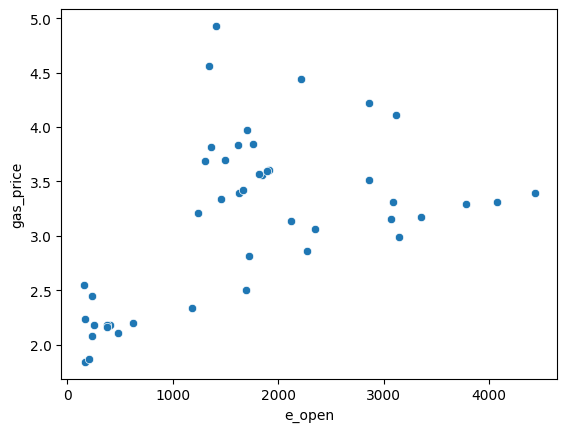

In [28]:
sns.scatterplot(x='e_open', y='gas_price', data=merged_data)

In [29]:
correlation_coefficient = merged_data['e_open'].corr(merged_data['gas_price'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.5278617430880634
Correlation Level: moderate correlation
